# protostars
## 05- Solid angle ratio
### I. What are the flux units?

Compare Black Body and `Phoenix` units.  

See [Issue #5](https://github.com/BrownDwarf/protostars/issues/5) and [this other notebook](./protostars_04-01_star_BB_solid_angle_ratio.ipynb) for a statement of the problem.

## $\Omega$ ratio

$\Omega_1 = 10^{\log{\Omega_1}}$ <-- star solid angle  
$\Omega_2 = 10^{\log{\Omega_2}}$ <-- disk solid angle

$k_\Omega \equiv \frac{\Omega_2}{\Omega_1}$  <-- Ratio of areas subtended by disk and star

Recap So we'd predict that the solid angle of the disk should be much larger than the solid angle of the star:  

$k_\Omega > 1$  

...given that the disk is cooler than the star.

But instead we find:

$k_\Omega \sim 0.01$

In [1]:
from astropy.analytic_functions import blackbody_lambda
import pandas as pd

In [2]:
dat = pd.read_csv('../sf/exp1/output/veil1/run01/models_ff-05_50_95.csv')

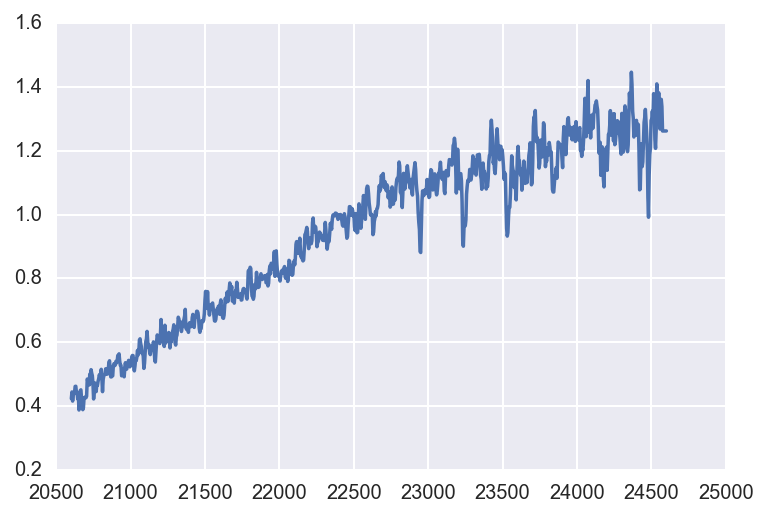

In [3]:
plt.plot(dat.wl, dat.data)

In [4]:
label = [r"$T_{\mathrm{eff}}$", r"$\log{g}$", r"$[\mathrm{Fe}/\mathrm{H}]$",r"$v_z$", r"$v\sin{i}$", r"$\log{\Omega}$", 
         r"$T_{\mathrm{BB}}$", r"$\log{\Omega_2}$", r"$c^1$", r"$c^2$", r"$c^3$", r"sigAmp", r"logAmp", r"$l$"] 

In [5]:
_ =[print(i, lab) for i, lab in enumerate(label)]

0 $T_{\mathrm{eff}}$
1 $\log{g}$
2 $[\mathrm{Fe}/\mathrm{H}]$
3 $v_z$
4 $v\sin{i}$
5 $\log{\Omega}$
6 $T_{\mathrm{BB}}$
7 $\log{\Omega_2}$
8 $c^1$
9 $c^2$
10 $c^3$
11 sigAmp
12 logAmp
13 $l$


In [6]:
ws = np.load('../sf/exp2/output/veil1/run02/emcee_chain.npy')
raw_models = np.load('../sf/exp2/output/veil1/run02/temp_raw_models.npy')

In [7]:
raw_models.shape

(5000, 40, 2, 936)

In [8]:
i = np.random.randint(4000, 5000)
j = np.random.randint(0, 40)
i,j

(4203, 37)

In [9]:
ws.shape

(40, 5000, 14)

In [10]:
vec = ws[j, i,:]

In [11]:
vec

array([  2.88635575e+03,   3.72808562e+00,   5.41987531e-02,
         1.13162751e+02,   9.99884836e+01,  -6.12534927e-02,
         1.09943112e+03,  -1.90978507e+00,   7.10318006e-01,
         5.57813074e-02,  -1.78431395e-03,   1.94949456e-01,
        -1.41283156e+00,   1.23334472e+02])

In [12]:
star, disk = raw_models[i, j, 0, :], raw_models[i, j, 1, :]

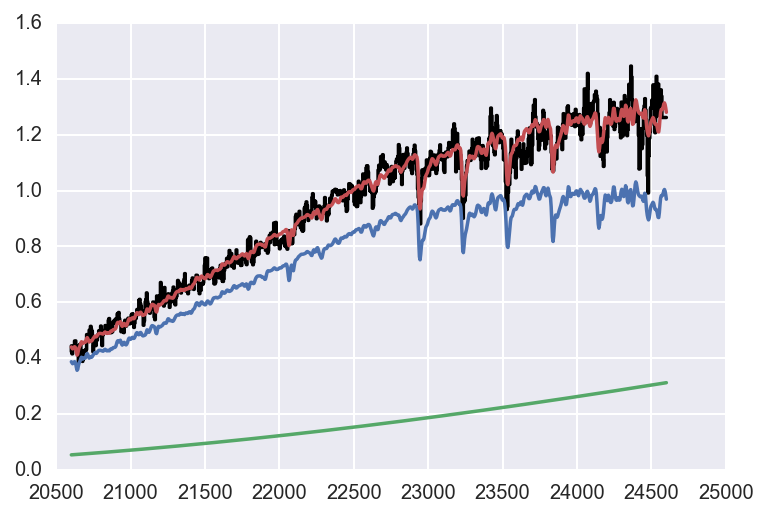

In [13]:
plt.step(dat.wl, dat.data, 'k')
plt.plot(dat.wl, star)
plt.plot(dat.wl, disk)
plt.plot(dat.wl, star+disk)

Figure out the Chebyshev spectrum.

In [14]:
from numpy.polynomial import Chebyshev as Ch

In [15]:
len_wl = len(dat.wl)
xs = np.arange(len_wl)

In [16]:
coeff = [1]
T = []
for i in range(1, 4):
    # print("i = ", i)
    coeff = [0] + coeff
    Chtemp = Ch(coeff, domain=[0, len_wl - 1])
    Ttemp = Chtemp(xs)
    T += [Ttemp]

In [17]:
T = np.array(T)

In [18]:
#plt.plot(T[0])
#plt.plot(T[1])
#plt.plot(T[2])

In [19]:
cns = vec[[8,9, 10]]
cns

array([ 0.71031801,  0.05578131, -0.00178431])

In [20]:
Tc = np.dot(T.T, cns)
k = 1 + Tc

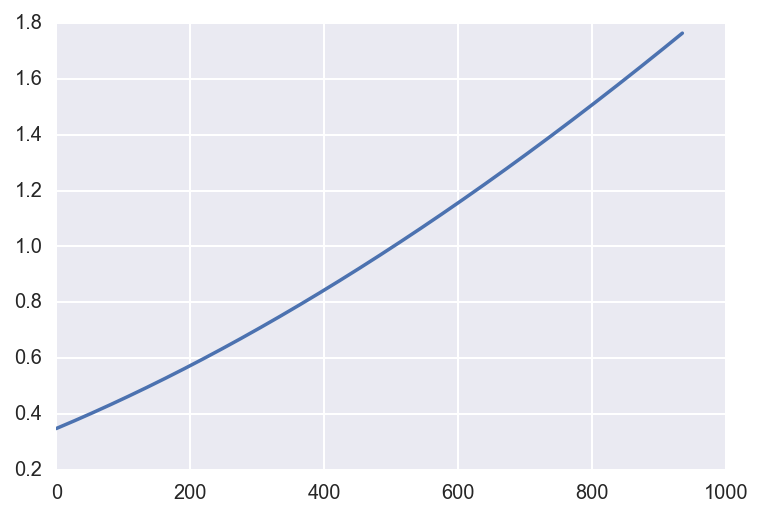

In [21]:
plt.plot(k)

In [22]:
omega = 10**vec[5]
omega2 = 10**vec[7]

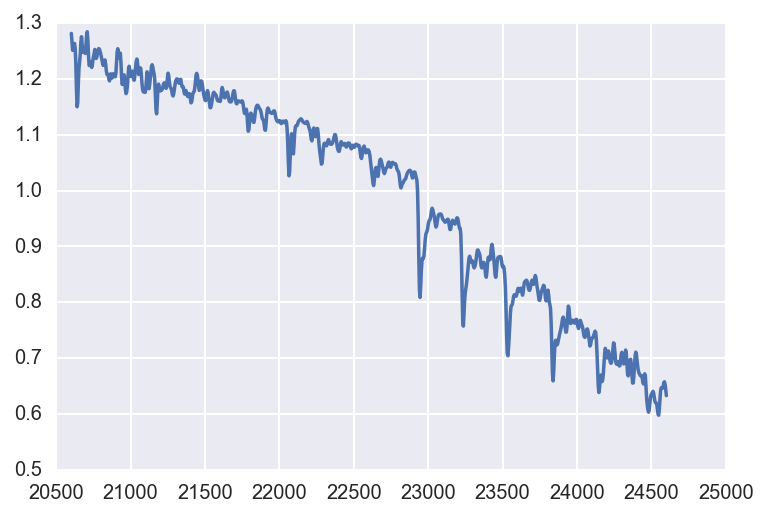

In [23]:
#plt.step(dat.wl, dat.data/k, 'k')
plt.plot(dat.wl, star/k/omega)
#plt.plot(dat.wl, disk/k/omega2)
#plt.plot(dat.wl, star/k+disk/k)

In [24]:
print(omega2/omega)

0.0141732164388


In [25]:
T_BB = vec[6]

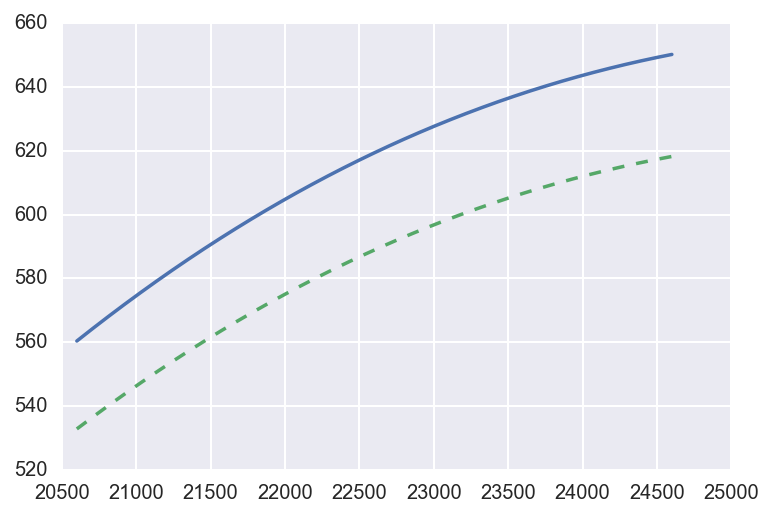

In [26]:
plt.plot(dat.wl, blackbody_lambda(dat.wl, T_BB))
plt.plot(dat.wl, disk/k/omega2*43.1, '--')

### What units are the Phoenix models in?

See the GitHub